# TP1

# Integrantes

- Hagata, Juan Pablo
- Sossa, Fabian
- Juárez Yélamos, Fausto


In [1]:
#%pip install asttokens==2.4.1 certifi==2024.8.30 charset-normalizer==3.4.0 comm==0.2.2 contourpy==1.3.0 cycler==0.12.1 debugpy==1.8.7 decorator==5.1.1 exceptiongroup==1.2.2 executing==2.1.0 fonttools==4.54.1 idna==3.10 ipykernel==6.29.5 ipython==8.28.0 jedi==0.19.1 jupyter_client==8.6.3 jupyter_core==5.7.2 kiwisolver==1.4.7 matplotlib==3.9.2 matplotlib-inline==0.1.7 nest-asyncio==1.6.0 numpy==2.1.2 opencv-python==4.10.0.84 packaging==24.1 pandas==2.2.3 parso==0.8.4 pexpect==4.9.0 pillow==10.4.0 platformdirs==4.3.6 prompt_toolkit==3.0.48 psu

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import requests

## Parte 1 (imágenes en /white_patch y /coord_cromaticas)

### 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.


In [3]:
def load_image(image_path):
    #return cv2.imread(image_path)
    # Hacer una solicitud GET a la URL
    response = requests.get(image_path)

    # Verificar que la solicitud fue exitosa
    if response.status_code == 200:
        # Convertir la imagen en un array NumPy
        image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

        # Leer la imagen usando OpenCV
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        print(image.shape)
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    else:
        print("Error al descargar la imagen.")

In [4]:
def coord_cromaticas(image):

    # Convertir a formato de punto flotante
    image_float = image.astype(np.float32)

    # Sumar los canales RGB
    sum_channels = image_float.sum(axis=2, keepdims=True)

    # Evitar divisiones por cero
    sum_channels[sum_channels == 0] = 1

    # Calcular coordenadas cromáticas r', g' (se puede derivar b' como 1 - r' - g')
    chromatic_image = image_float / sum_channels

    # Escalar las coordenadas cromáticas para visualización
    chromatic_image = (chromatic_image * 255).astype(np.uint8)
    
    return chromatic_image


In [5]:
# Cargamos las imagenes de coordenadas cromaticas
coord_cromaticas_path = [
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP1/coord_cromaticas/CoordCrom_1.png?raw=true',
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP1/coord_cromaticas/CoordCrom_2.png?raw=true',
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP1/coord_cromaticas/CoordCrom_3.png?raw=true',
]

coord_cromaticas_img = [load_image(path) for path in coord_cromaticas_path]

(996, 908, 3)
(996, 908, 3)
(996, 908, 3)


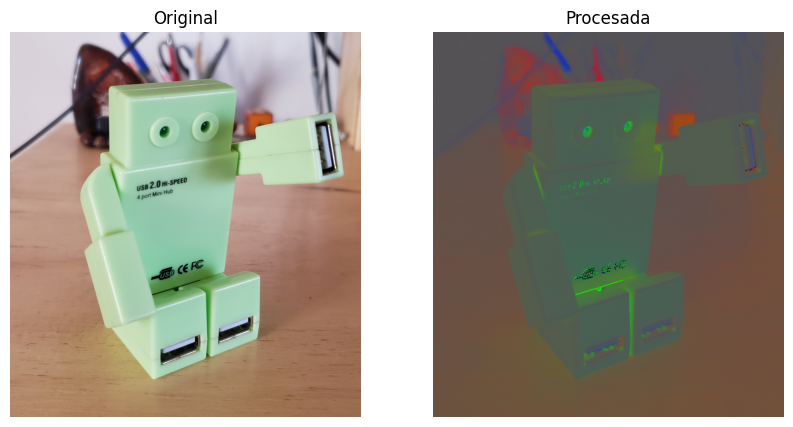

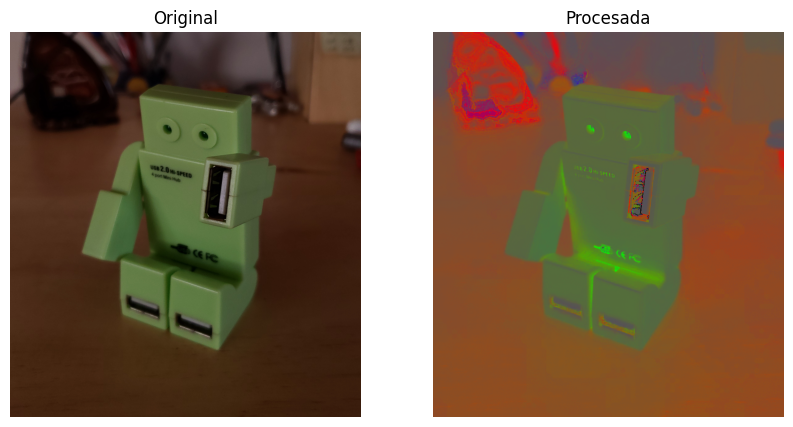

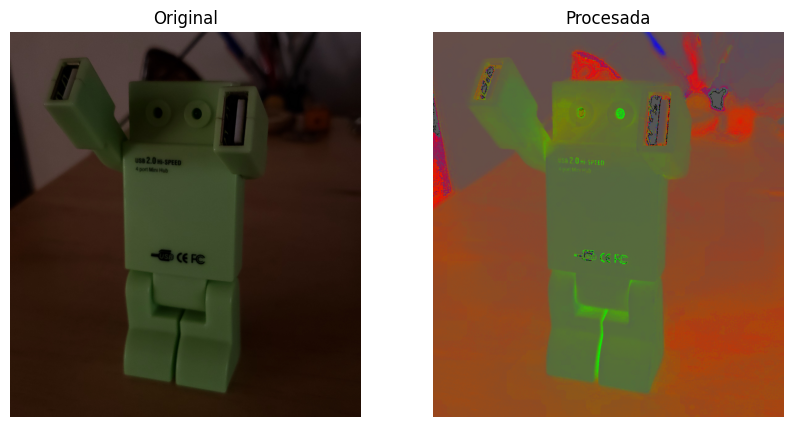

In [6]:
for img in coord_cromaticas_img:
    plt.figure(figsize=(10, 5))
    
    # Mostrar imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original')
    plt.axis('off')

    # Mostrar imagen procesada
    plt.subplot(1, 2, 2)
    plt.imshow(coord_cromaticas(img))
    plt.title('Procesada')
    plt.axis('off')
    
    # Mostrar ambas imágenes
    plt.show()


### 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.


In [7]:
"""def white_patch(image):
    # Convertir la imagen a formato flotante
    image_float = image.astype(np.float32)

    # Encontrar el valor máximo para cada canal
    max_r = np.max(image_float[:, :, 2])  # Canal R (Rojo)
    max_g = np.max(image_float[:, :, 1])  # Canal G (Verde)
    max_b = np.max(image_float[:, :, 0])  # Canal B (Azul)

    # Normalizar cada canal
    image_float[:, :, 2] = image_float[:, :, 2] / max_r
    image_float[:, :, 1] = image_float[:, :, 1] / max_g
    image_float[:, :, 0] = image_float[:, :, 0] / max_b

    # Escalar los valores
    image_white_balanced = np.clip(image_float * 255.0, 0, 255).astype(np.uint8)

    return image_white_balanced
"""

def white_patch(image):
    # Convertir la imagen a formato flotante
    image_float = image.astype(np.float32)

    # Encontrar el decil 99% para cada canal
    decile_r = np.percentile(image_float[:, :, 2], 99)
    decile_g = np.percentile(image_float[:, :, 1], 99)
    decile_b = np.percentile(image_float[:, :, 0], 99)

    # Normalizar cada canal
    image_float[:, :, 2] = image_float[:, :, 2] / decile_r
    image_float[:, :, 1] = image_float[:, :, 1] / decile_g
    image_float[:, :, 0] = image_float[:, :, 0] / decile_b

    # Escalar los valores
    image_white_balanced = np.clip(image_float * 255.0, 0, 255).astype(np.uint8)

    return image_white_balanced

In [8]:
# Cargamos las imagenes de white patch
white_patch_path = [
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP1/white_patch/test_blue.png?raw=true',
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP1/white_patch/test_green.png?raw=true',
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP1/white_patch/test_red.png?raw=true',
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP1/white_patch/wp_blue.jpg?raw=true',
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP1/white_patch/wp_green.png?raw=true',
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP1/white_patch/wp_green2.jpg?raw=true',
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP1/white_patch/wp_red.png?raw=true',
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP1/white_patch/wp_red2.jpg?raw=true',
]

white_patch_img = [load_image(path) for path in white_patch_path]

(100, 278, 3)
(100, 278, 3)
(99, 276, 3)
(1600, 1200, 3)
(571, 363, 3)
(1600, 1200, 3)
(813, 481, 3)
(1600, 1200, 3)


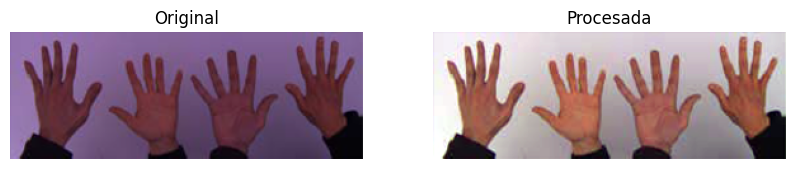

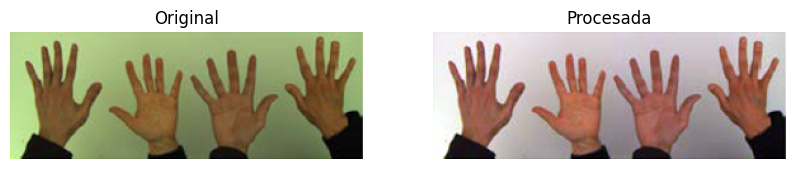

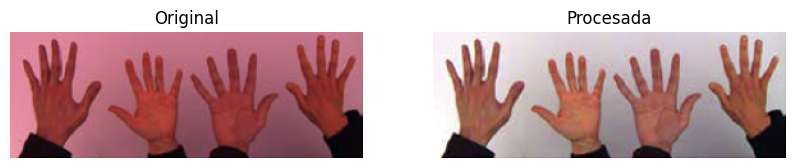

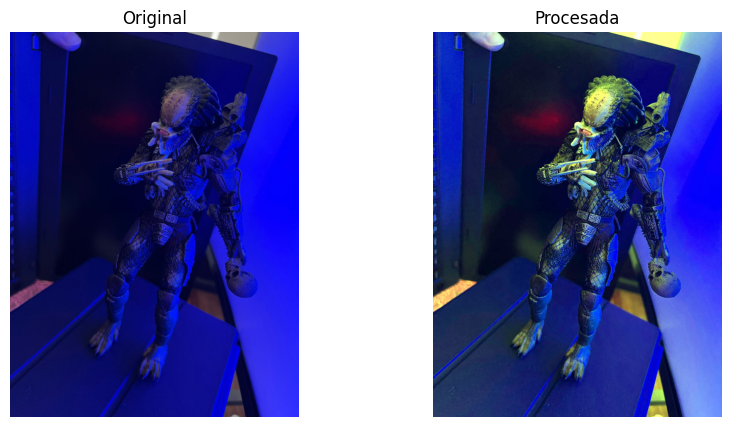

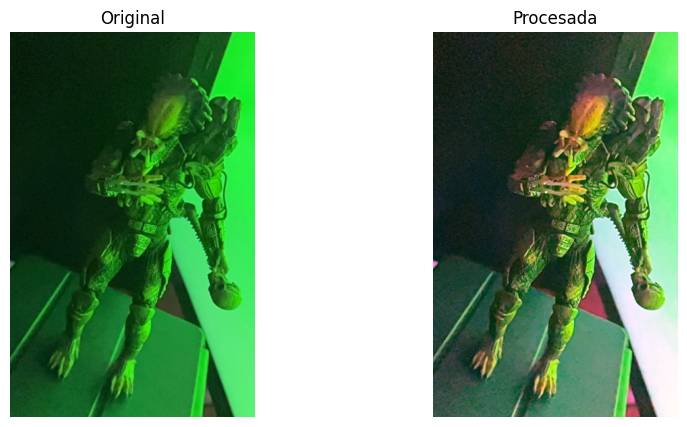

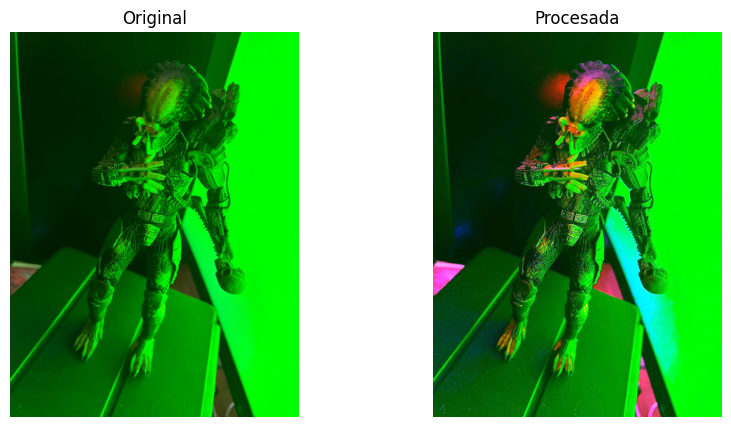

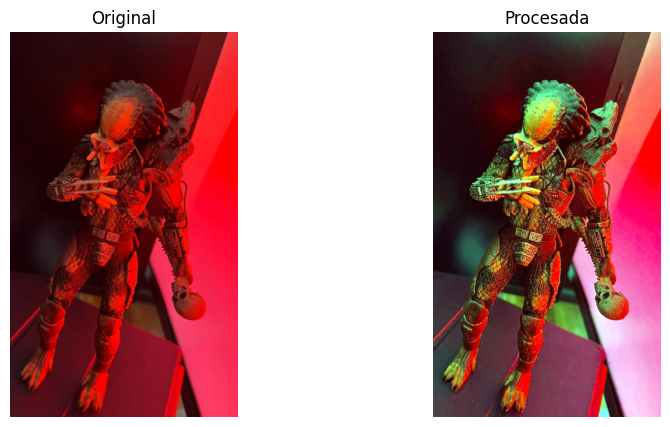

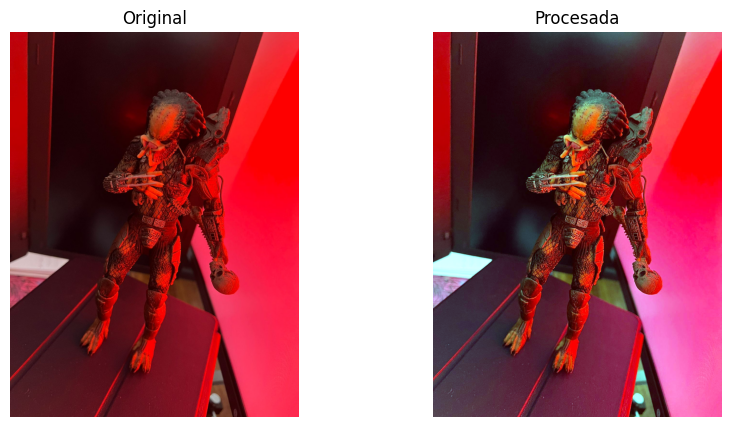

In [9]:
for img in white_patch_img:
    plt.figure(figsize=(10, 5))
    
    # Mostrar imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original')
    plt.axis('off')

    # Mostrar imagen procesada
    plt.subplot(1, 2, 2)
    plt.imshow(white_patch(img))
    plt.title('Procesada')
    plt.axis('off')    
    # Mostrar ambas imágenes
    plt.show()



## Parte 2:

### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
### 2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘ features ’ a los histogramas
### 3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.


In [10]:
# Cargamos las imagenes en blanco y negro
bw_path = [
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP1/img1_tp.png?raw=true',
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP1/img2_tp.png?raw=true',
]

bw_img = [load_image(path) for path in bw_path]

(288, 287, 3)
(288, 287, 3)


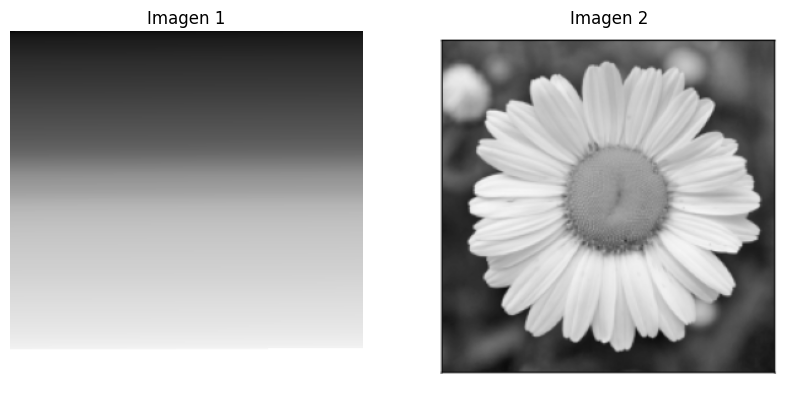

In [11]:
fig, axes = plt.subplots(1, len(bw_img), figsize=(10, 5))
for id, img in enumerate(bw_img):
    plt.subplot(1, 2, id+1)
    plt.imshow(img, cmap='gray')
    axes[id].set_title(f"Imagen {id+1}")
    plt.axis('off')


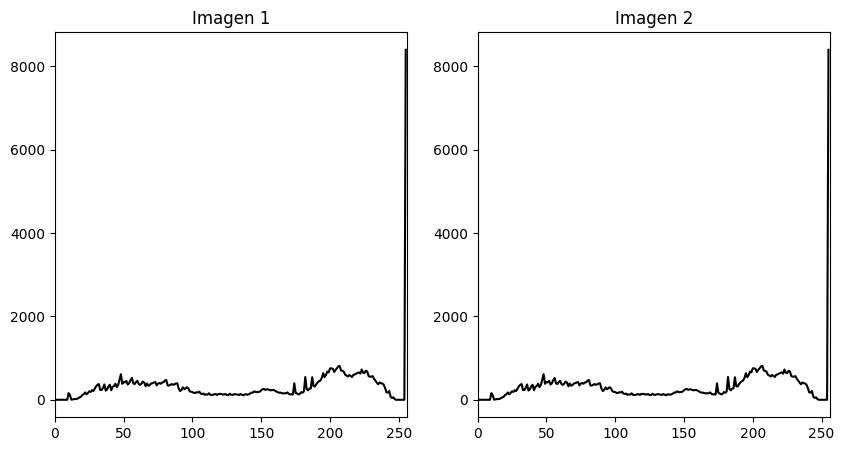

In [12]:
fig, axes = plt.subplots(1, len(bw_img), figsize=(10, 5))
for id, img in enumerate(bw_img):
    plt.subplot(1, 2, id+1)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    axes[id].plot(hist, color='black')
    axes[id].set_title(f"Imagen {id+1}")
    axes[id].set_xlim([0, 256])


Un modelo de clasificación o detección de imágenes, el uso de histogramas como features podría ser útil, ya que:

- Los histogramas capturan la distribución de la intensidad de los píxeles, lo que es indicativo de las características visuales globales de una imagen, como el brillo, el contraste o el tono dominante.
- En ciertas tareas de clasificación de imágenes (como detección de objetos o análisis de texturas), la información de color y brillo puede ser un buen diferenciador entre clases.
- En escenarios donde el contenido de la imagen es altamente dependiente de la iluminación, los histogramas te permiten normalizar las imágenes o detectar patrones de intensidad que son más fáciles de clasificar. Sin embargo, los histogramas por sí solos no capturan la estructura espacial de la imagen (por ejemplo, las formas u objetos en la imagen). Para tareas más complejas, pueden combinarse con otras características como bordes, texturas o características extraídas mediante redes neuronales.
- En este caso particular se observa que tanto la imagen 1 como la image 2 tienen un histograma idéntico, pero que si observamos las imagenes son distintas.


In [13]:
# Cargamos la imagen a aplicar las mascaras
img_mask_path = 'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP1/segmentacion.png?raw=true'

mask_img = load_image(img_mask_path)

(628, 953, 3)


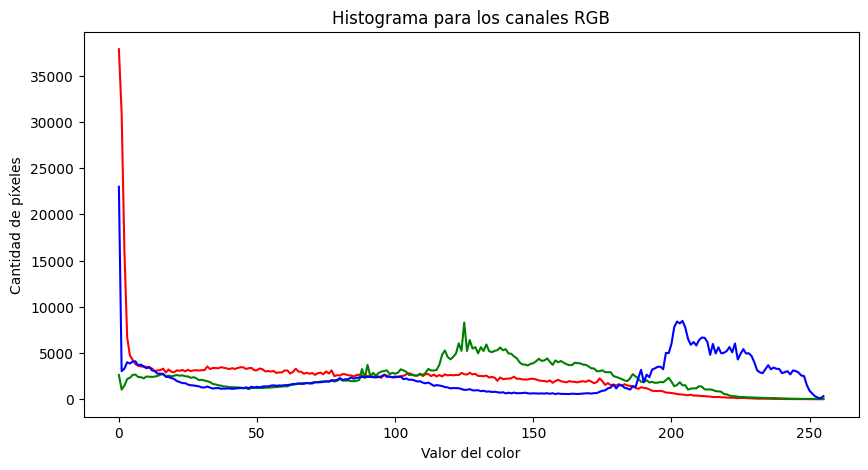

In [14]:
# Calcular los histogramas para cada canal de color (R, G, B)
colors = ('r', 'g', 'b')
channel_ids = (0, 1, 2)

# Dibujar el histograma para cada canal de color
plt.figure(figsize=(10, 5))
for channel_id, color in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        mask_img[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

# Configuraciones del gráfico
plt.title("Histograma para los canales RGB")
plt.xlabel("Valor del color")
plt.ylabel("Cantidad de píxeles")
plt.show()

In [15]:
# Función para aplicar máscaras
def apply_mask(image, lower_bound, upper_bound):
    # Crear una máscara basada en los límites de color
    mask = cv2.inRange(image, lower_bound, upper_bound)
    # Aplicar la máscara para obtener la región segmentada
    segmented = cv2.bitwise_and(image, image, mask=mask)
    return segmented


In [16]:
# Definir los rangos de color (agua, cielo, tierra)
# Estos son valores aproximados que puedes ajustar según la imagen
water_lower = np.array([100, 50, 0], dtype="uint8")
water_upper = np.array([255, 255, 150], dtype="uint8")

sky_lower = np.array([90, 150, 200], dtype="uint8")
sky_upper = np.array([255, 255, 255], dtype="uint8")

earth_lower = np.array([0, 0, 0], dtype="uint8")
earth_upper = np.array([100, 100, 100], dtype="uint8")

# Aplicar las máscaras
water_segment = apply_mask(mask_img, water_lower, water_upper)
sky_segment = apply_mask(mask_img, sky_lower, sky_upper)
earth_segment = apply_mask(mask_img, earth_lower, earth_upper)

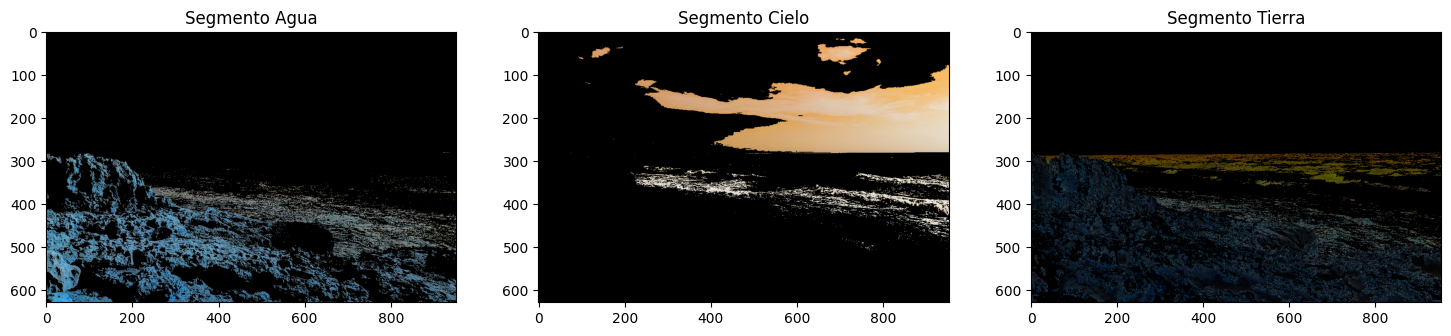

In [17]:
# Convertir las imágenes segmentadas de BGR a RGB para visualizar
water_segment_rgb = cv2.cvtColor(water_segment, cv2.COLOR_BGR2RGB)
sky_segment_rgb = cv2.cvtColor(sky_segment, cv2.COLOR_BGR2RGB)
earth_segment_rgb = cv2.cvtColor(earth_segment, cv2.COLOR_BGR2RGB)

# Visualizar las imágenes segmentadas
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(water_segment_rgb)
plt.title('Segmento Agua')

plt.subplot(1, 3, 2)
plt.imshow(sky_segment_rgb)
plt.title('Segmento Cielo')

plt.subplot(1, 3, 3)
plt.imshow(earth_segment_rgb)
plt.title('Segmento Tierra')

plt.show()